<a href="https://colab.research.google.com/github/Saritha199/ML/blob/main/final_prjct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Client's Subscription to a Term Deposit**




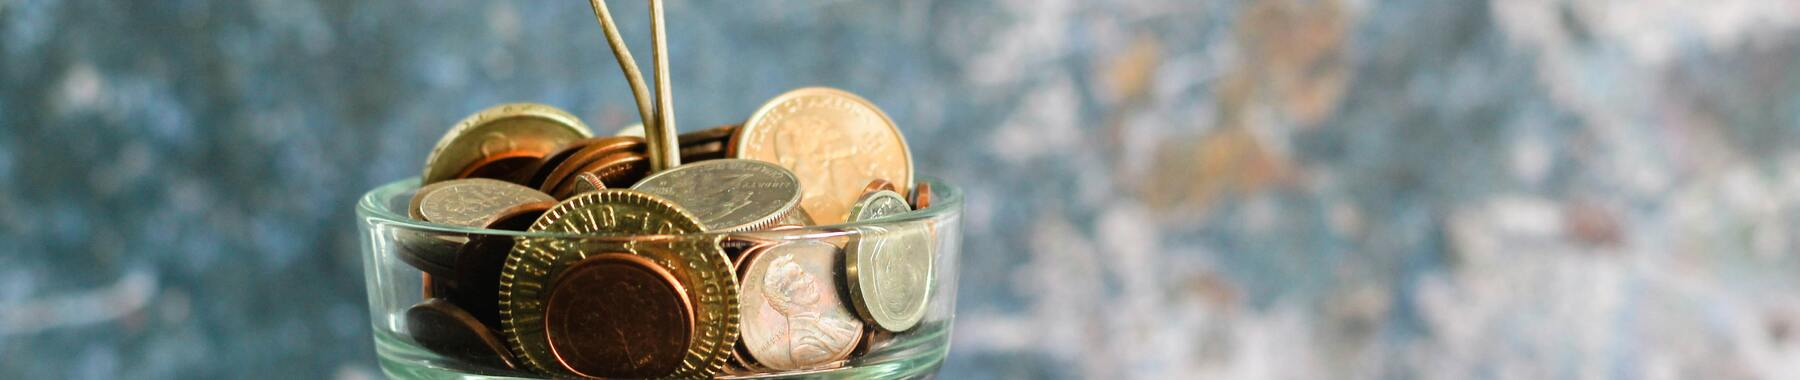



**About Dataset :**

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.


**Data Set Information :**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

**Goal:**
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features:**


*   age (numeric)
*   job: type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self- employed","services","student","technician","unemployed","unknown")


*   marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
*   education: education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")


*   default: has credit in default? (categorical: "no","yes","unknown")
*   housing: has housing loan? (categorical: "no","yes","unknown")




*   Loan: has personal loan? (categorical: "no","yes","unknown")




Related with the last contact of the current campaign:
*   contact: contact communication type (categorical: "cellular","telephone")
*   month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
*   day of week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
*   duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model


Other attributes:


*   campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*   pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*   previous: number of contacts performed before this campaign and for this client (numeric)
*   poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")


Output variable (desired target):
*   y: has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [3]:
df.shape

(32950, 16)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [7]:
#descriptive statistics
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
age,32950.000000,40.014112,10.403636,17.000000,32.000000,38.000000,47.000000,98.000000
duration,32950.000000,258.127466,258.975917,0.000000,103.000000,180.000000,319.000000,4918.000000
campaign,32950.000000,2.560607,2.752326,1.000000,1.000000,2.000000,3.000000,56.000000
pdays,32950.000000,962.052413,187.951096,0.000000,999.000000,999.000000,999.000000,999.000000
previous,32950.000000,0.174719,0.499025,0.000000,0.000000,0.000000,0.000000,7.000000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [10]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

<Axes: >

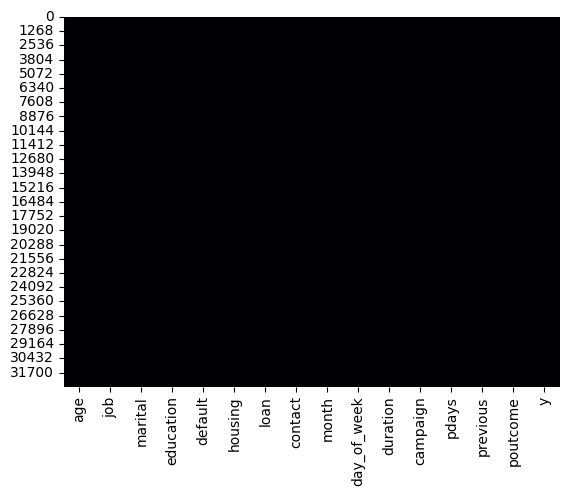

In [11]:
sns.heatmap(df.isna(),cmap='magma', cbar=False)
#visualizing missing values
# import missingno as msno
# msno.matrix(df)
# plt.xlabel('Columns')
# plt.title('Heat Map of Missing Values')
# plt.show()

In [12]:
#check for class imbalance
#target class count
df['y'].value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

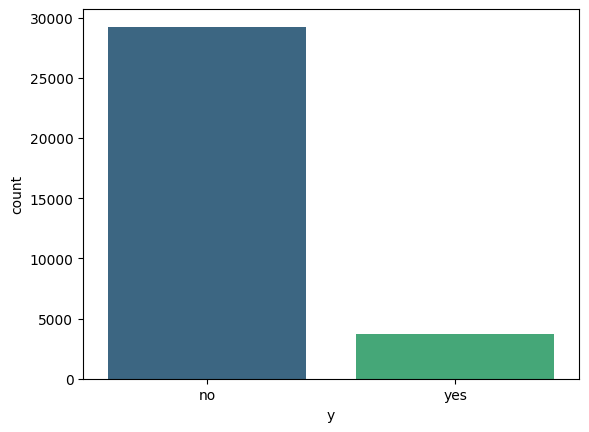

In [13]:
import seaborn as sns
sns.countplot(x=df['y'],palette='viridis')

percentage of NO and YES


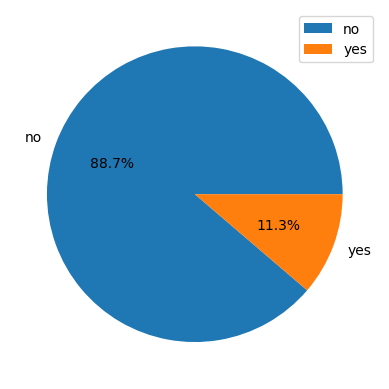

In [14]:
# percentage of class present in target variable(y)
print("percentage of NO and YES")
labels=['no','yes']
plt.pie(df['y'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.legend(df['y'].value_counts().index)

In [15]:
 #checking duplicate entries
print("Duplicate entries:", df.duplicated().sum())

Duplicate entries: 8


In [16]:
df = df.drop_duplicates()

# Exploratory Data Analysis



Univariate analysis of categorical variables



In [17]:
# indentifying the categorical variables
import matplotlib.pyplot as plt
cat_var=df.select_dtypes(include=['object']).columns
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

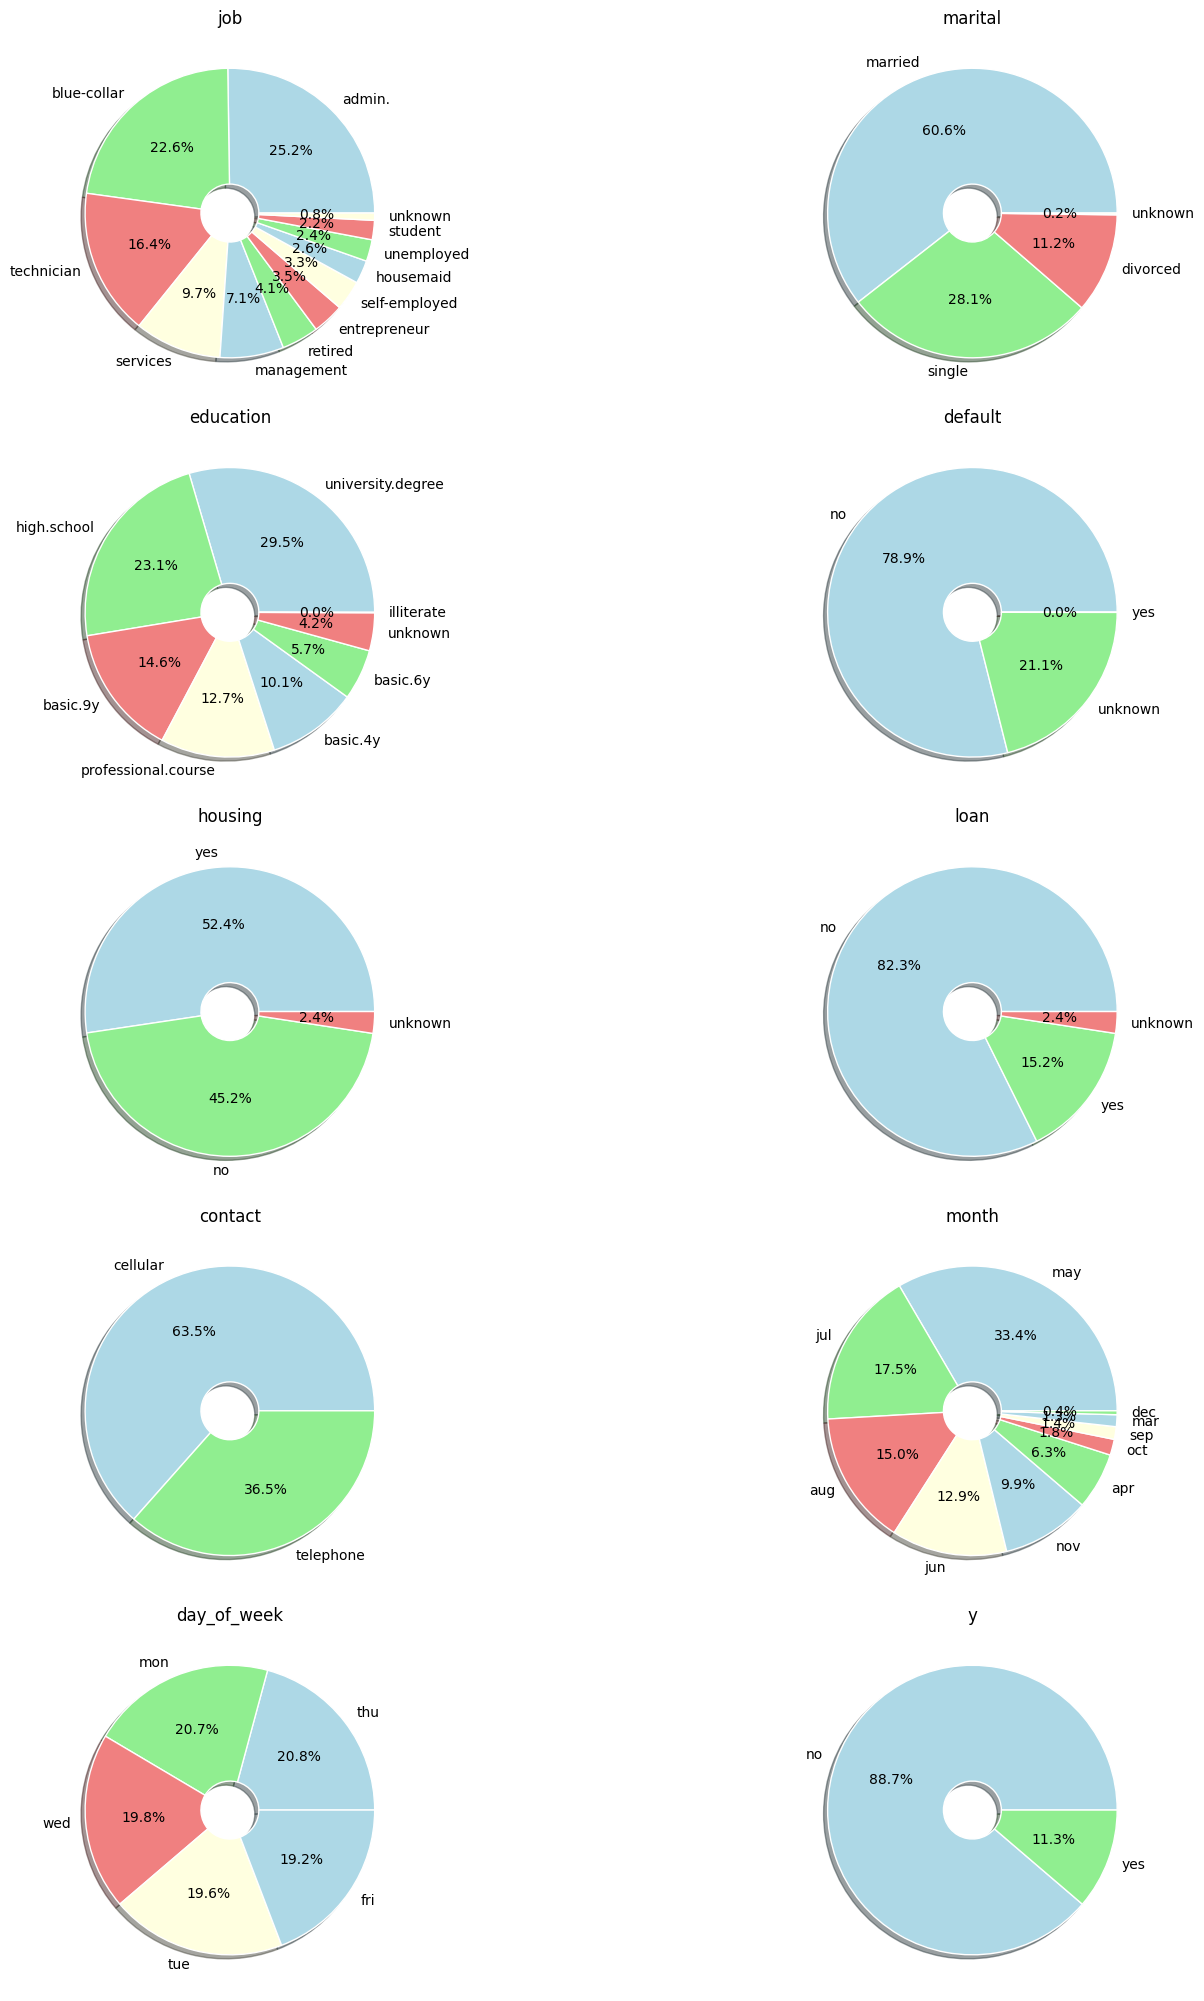

In [18]:
#donut_chart
plt.figure(figsize=(15,80))
plot_num = 1
for col in cat_var:
  if  col != "poutcome":
      plt.subplot(20,2,plot_num)
      plt.pie(data=df, x=df[col].value_counts().values,labels=df[col].value_counts().index,shadow=True,autopct='%1.1f%%',
      colors=['lightblue', 'lightgreen', 'lightcoral','lightyellow'],wedgeprops=dict(width=0.8,edgecolor="w") )
      plt.title(col)
      plot_num += 1
      plt.tight_layout()


Bivariate analysis of categorical variables

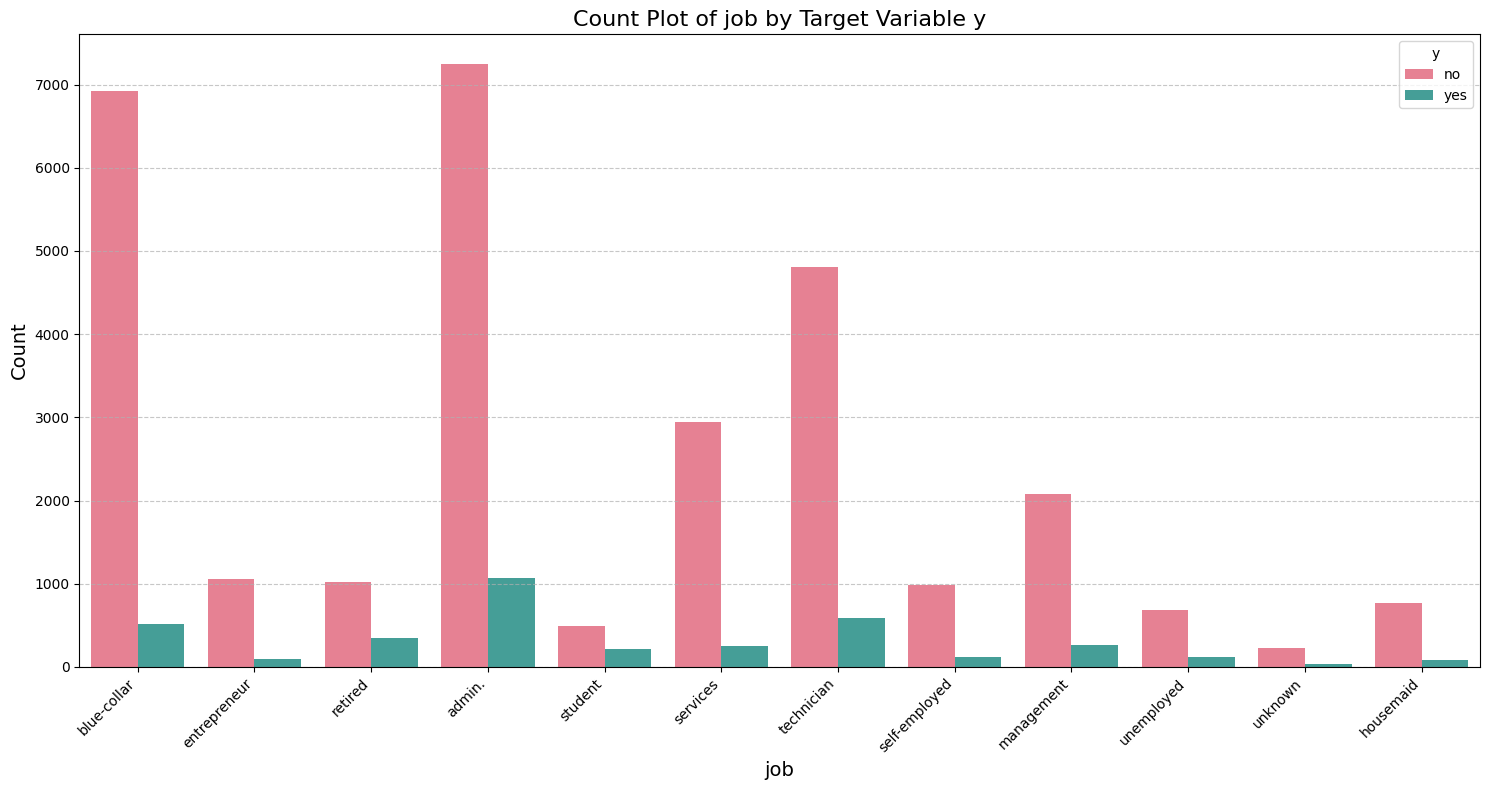

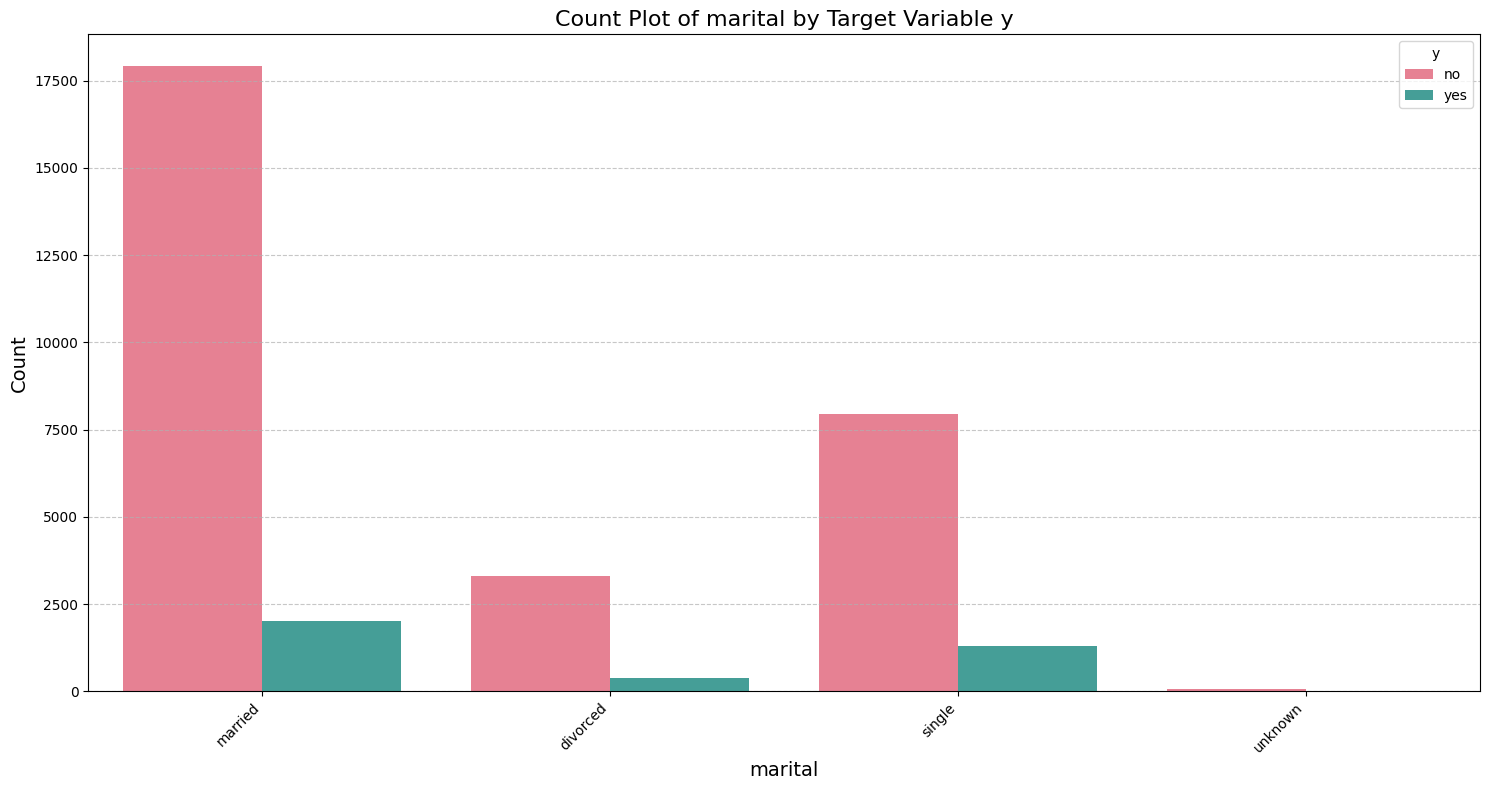

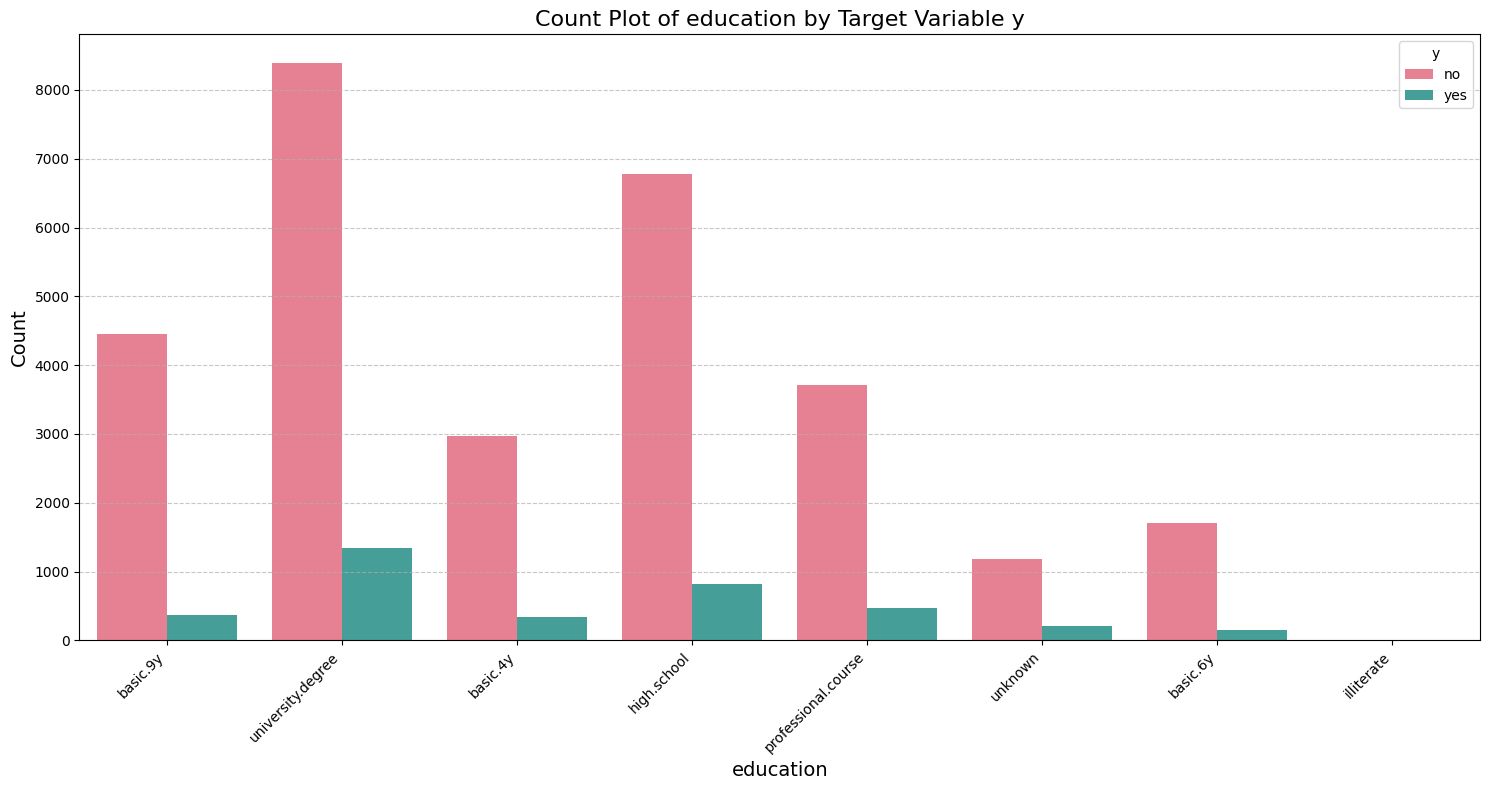

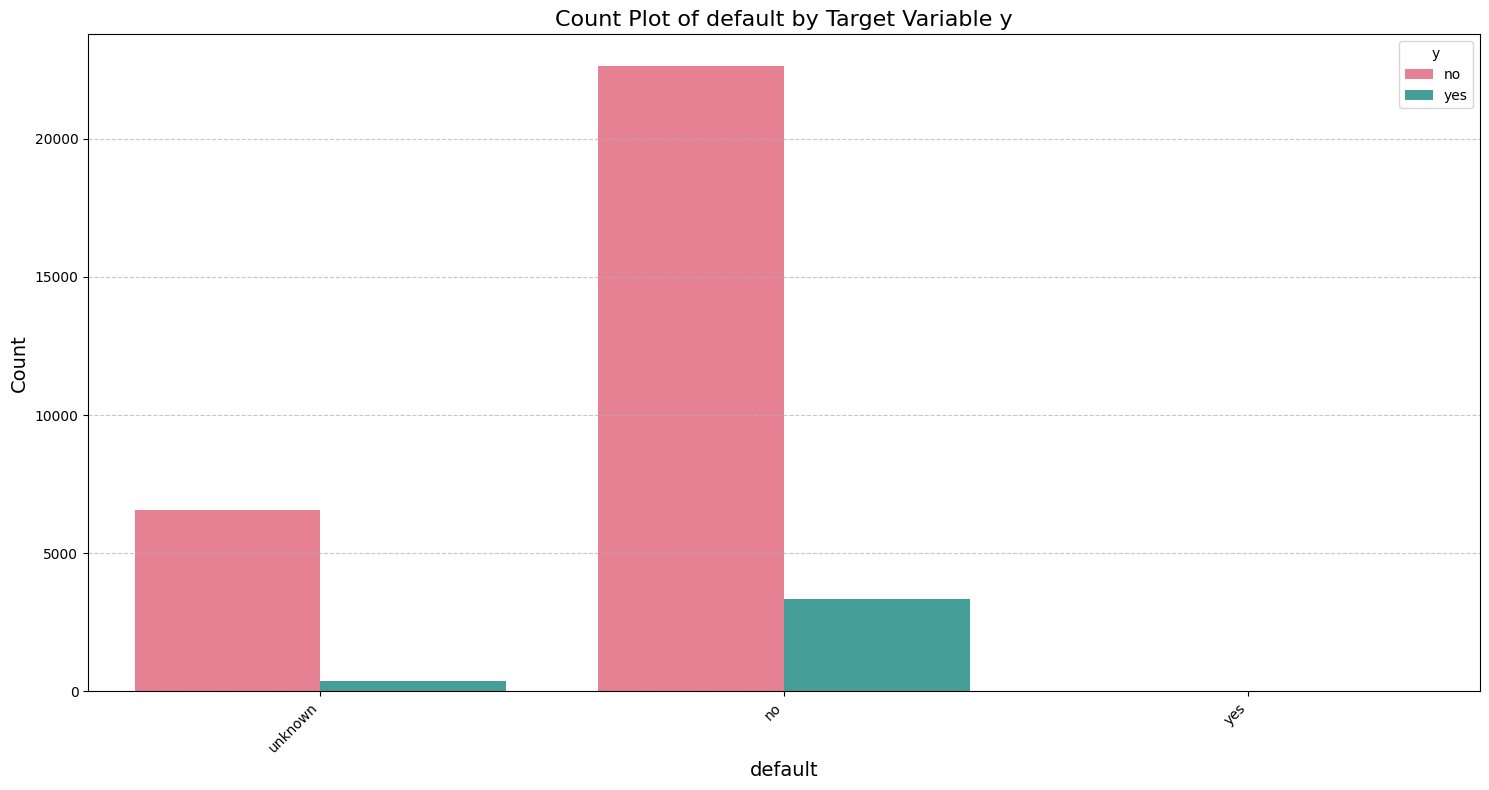

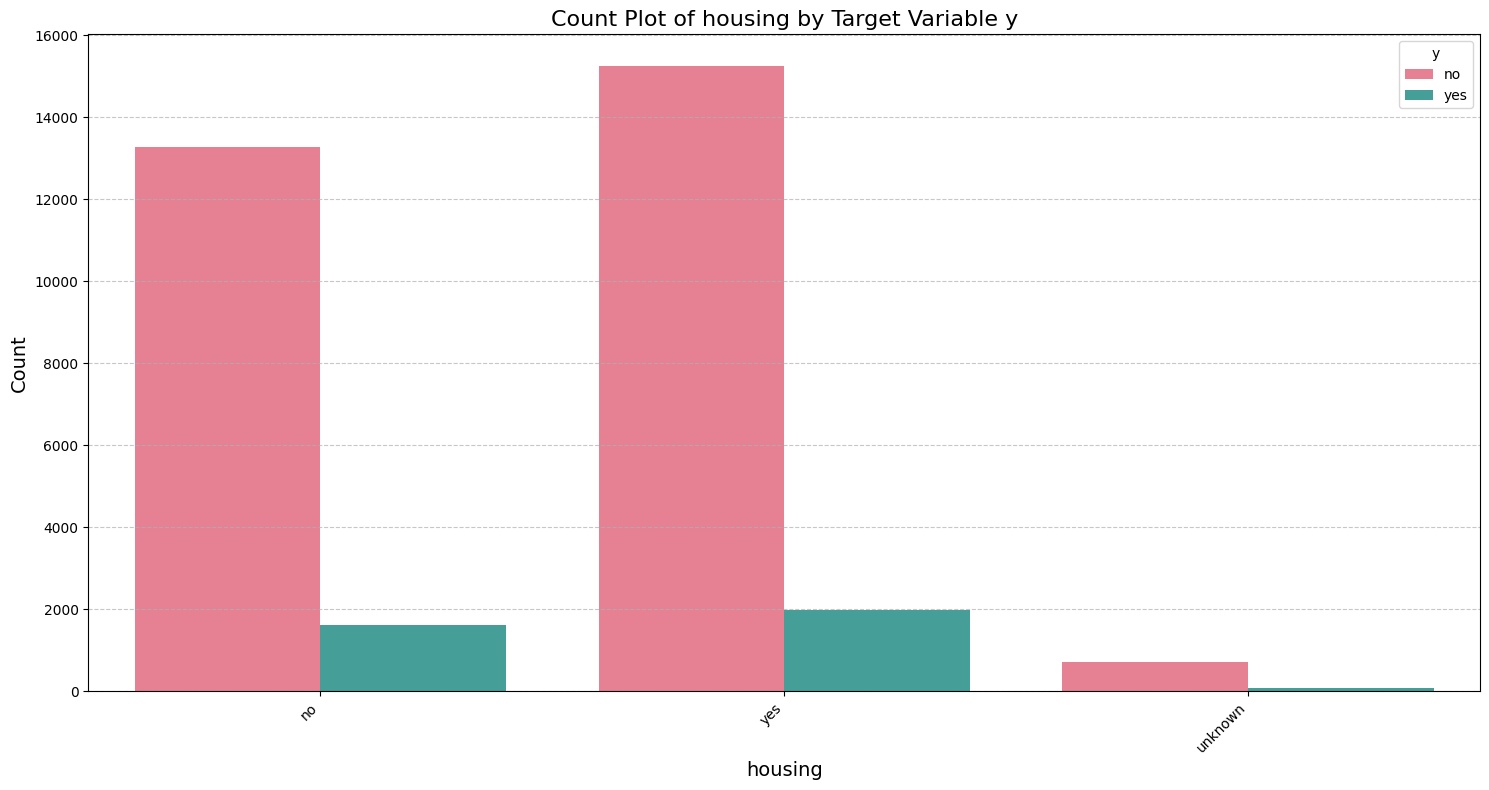

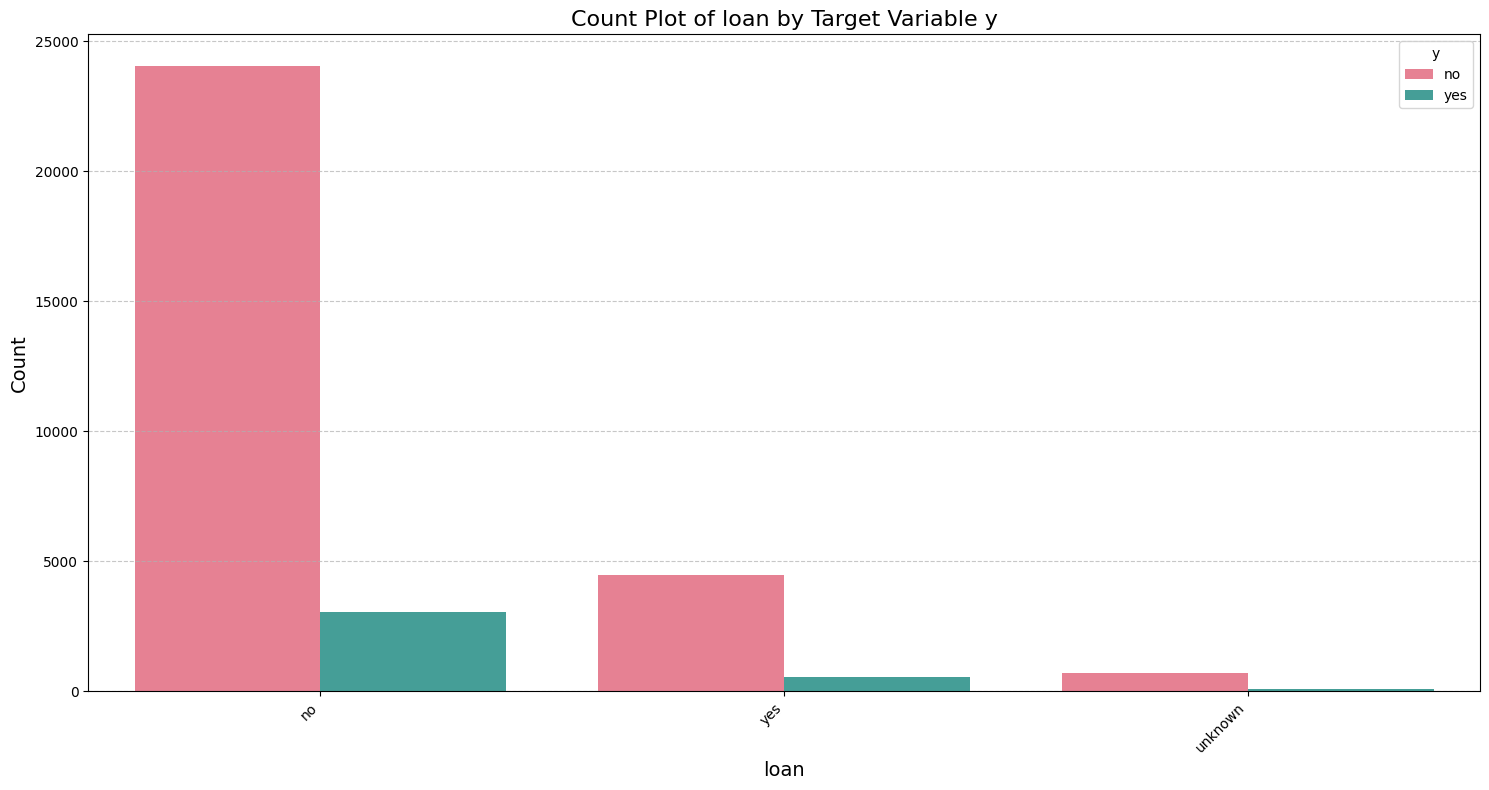

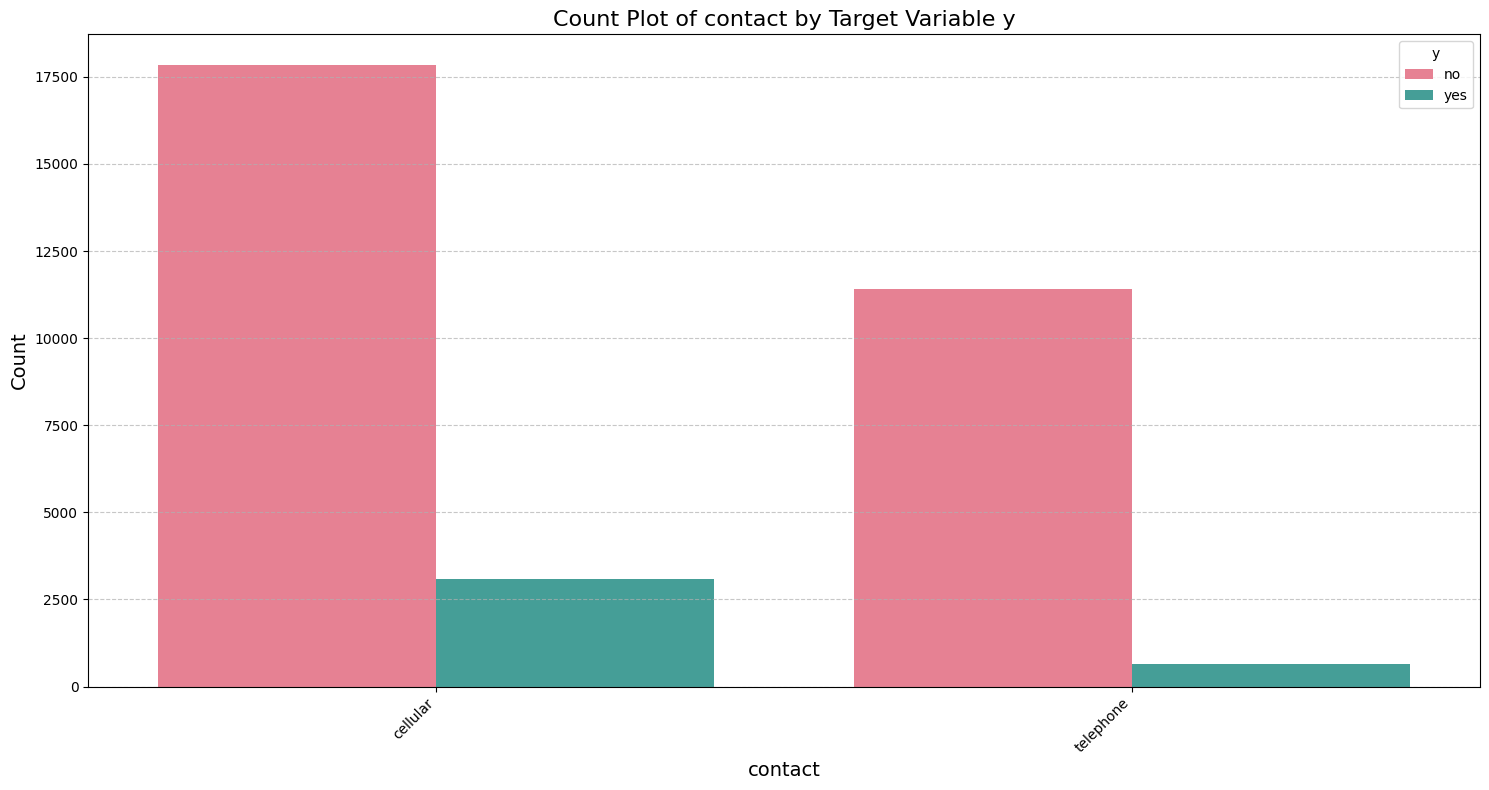

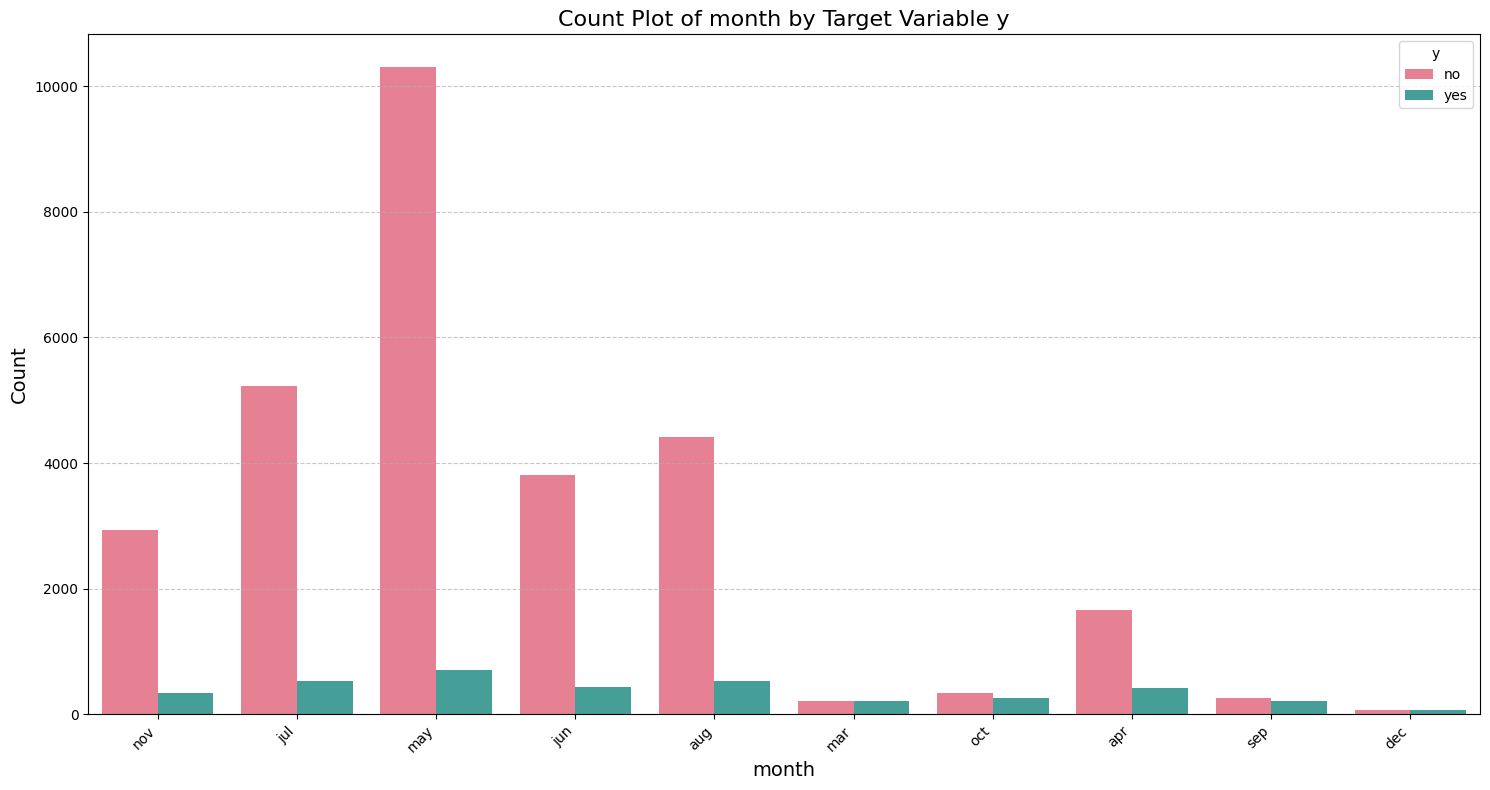

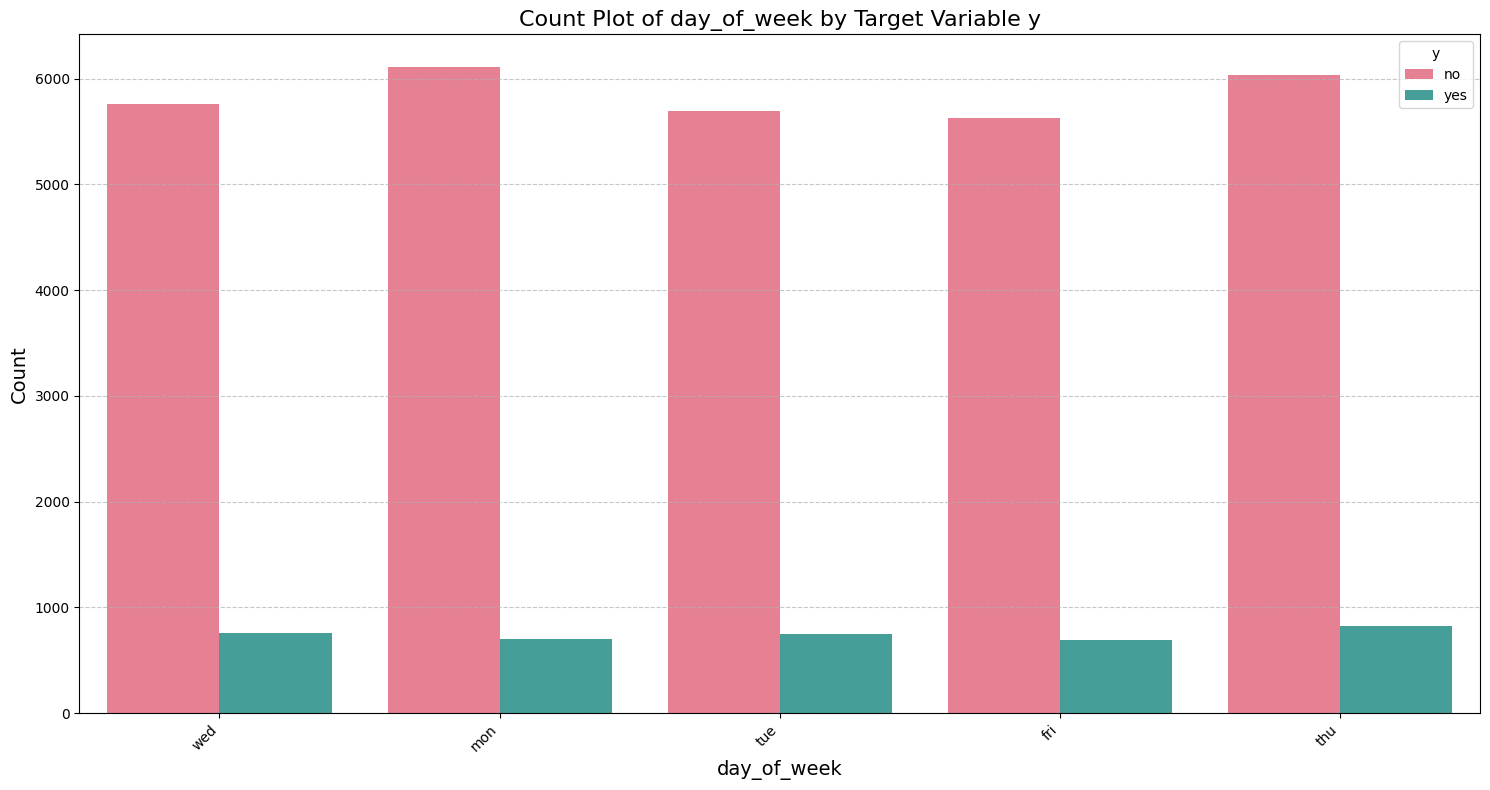

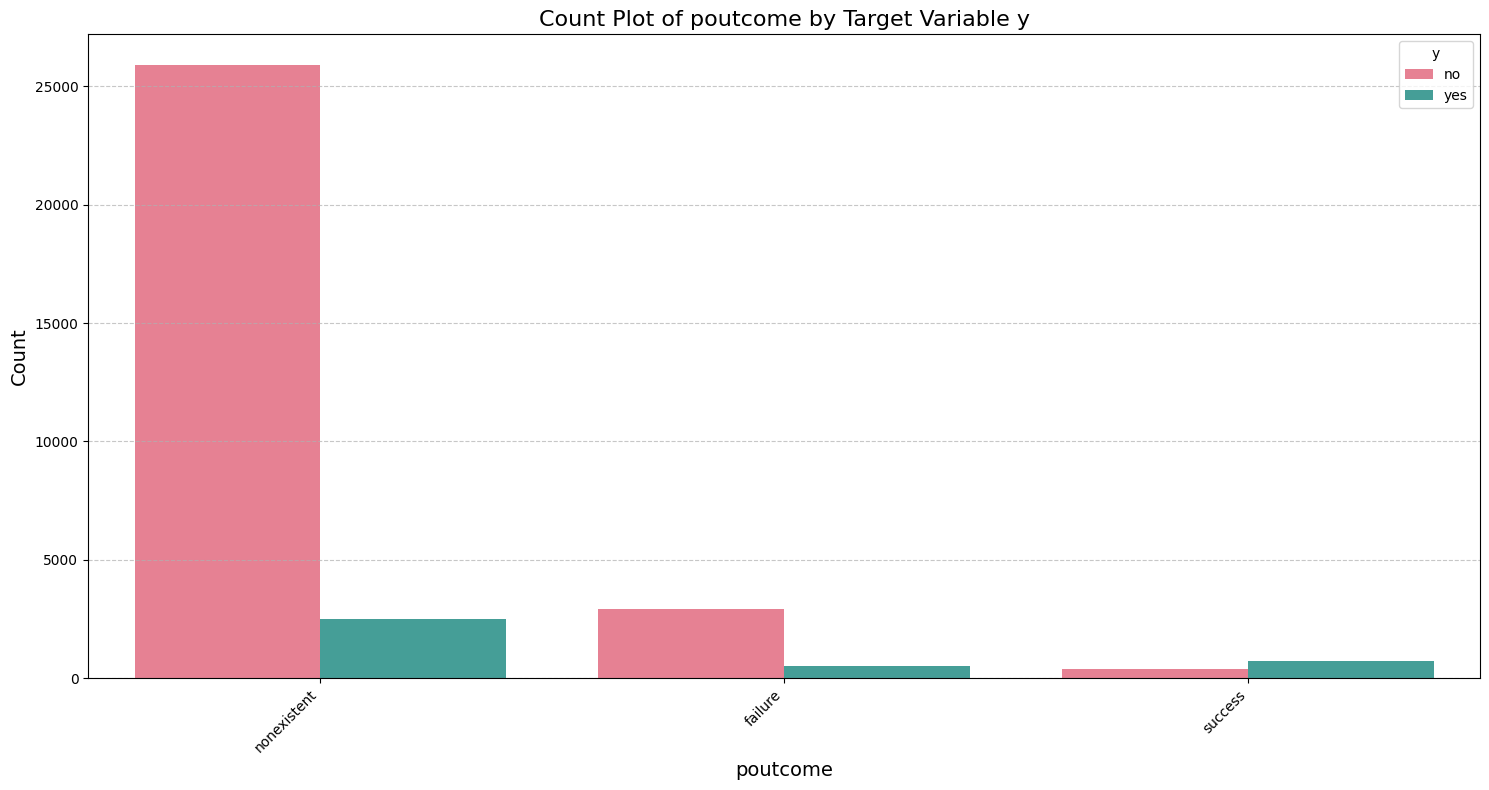

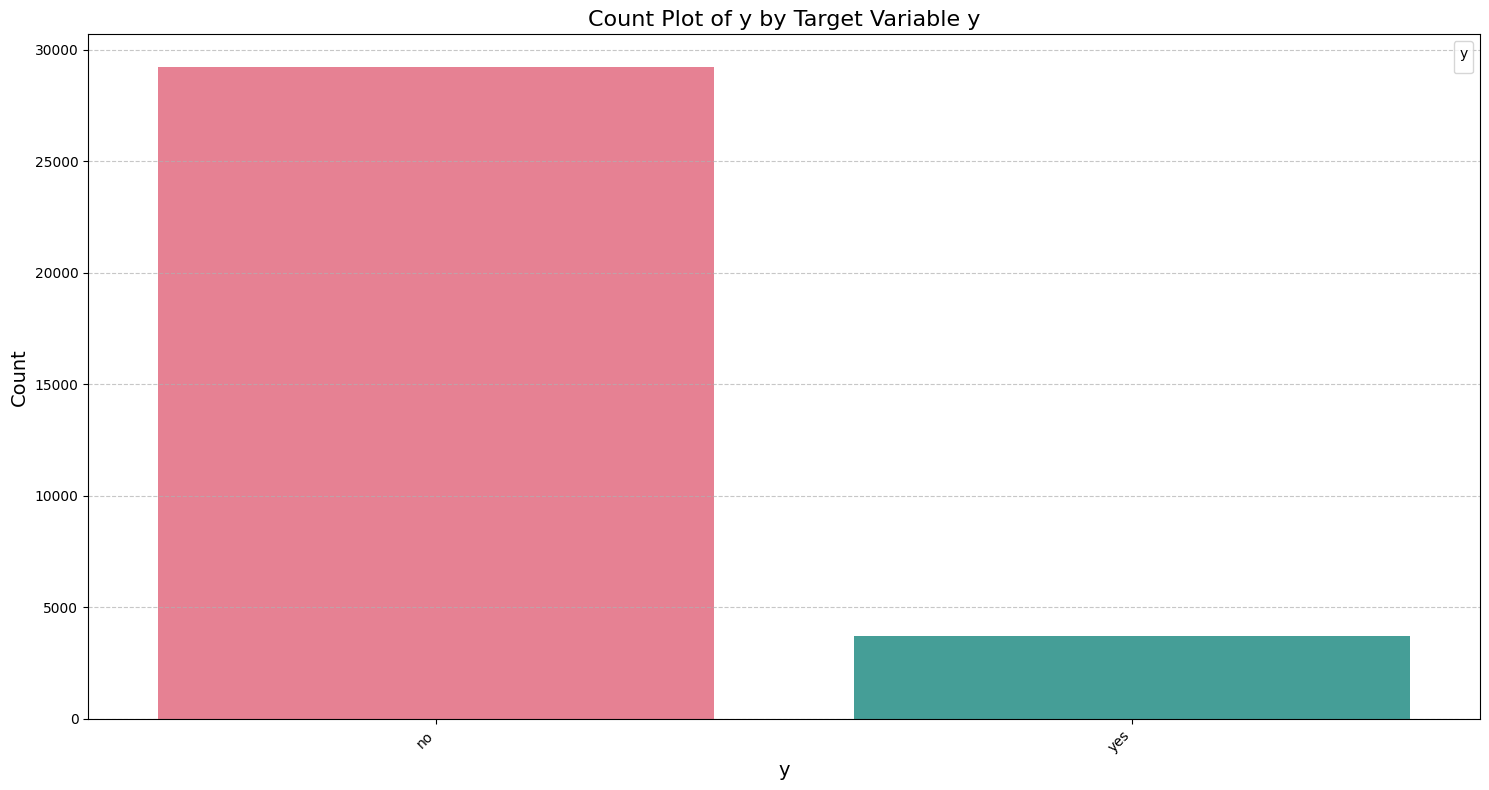

In [19]:
for i in cat_var:
    plt.figure(figsize=(15, 8))
    sns.countplot(x=df[i], hue=df['y'], palette='husl')
    plt.title(f'Count Plot of {i} by Target Variable y', fontsize=16)
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.legend(title='y')
    plt.show()

Univariate analysis of numerical variables


In [20]:
#indentifying the numerical variables
num_var=['age', 'duration', 'campaign', 'pdays', 'previous']
num_var

['age', 'duration', 'campaign', 'pdays', 'previous']

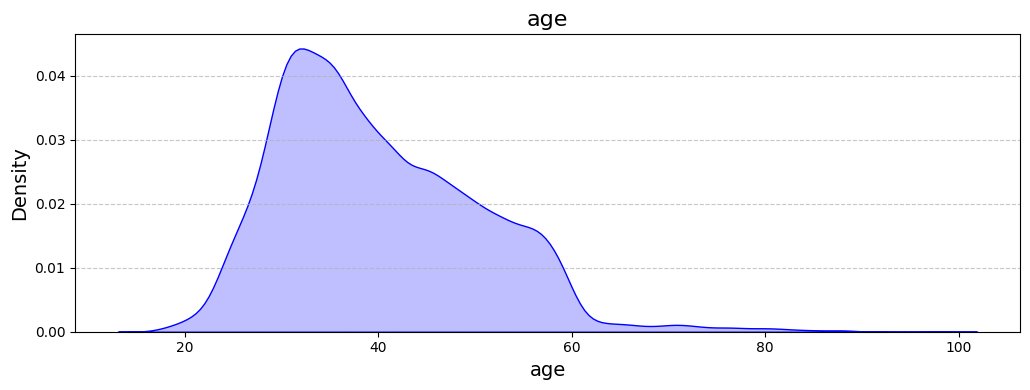

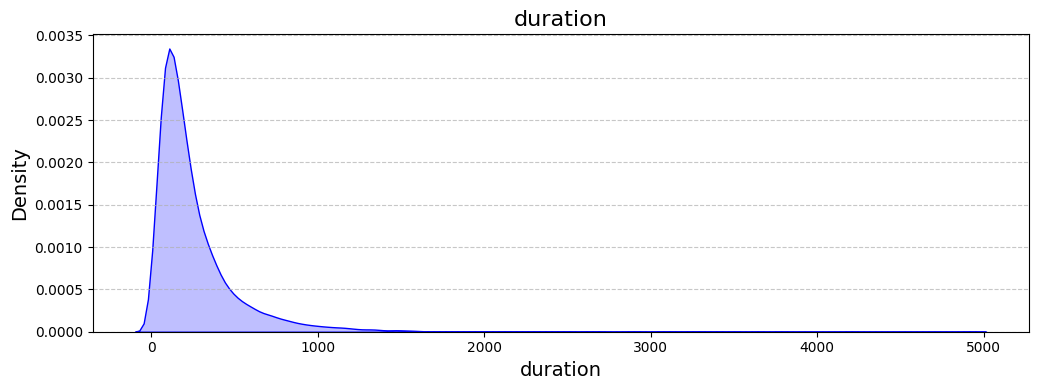

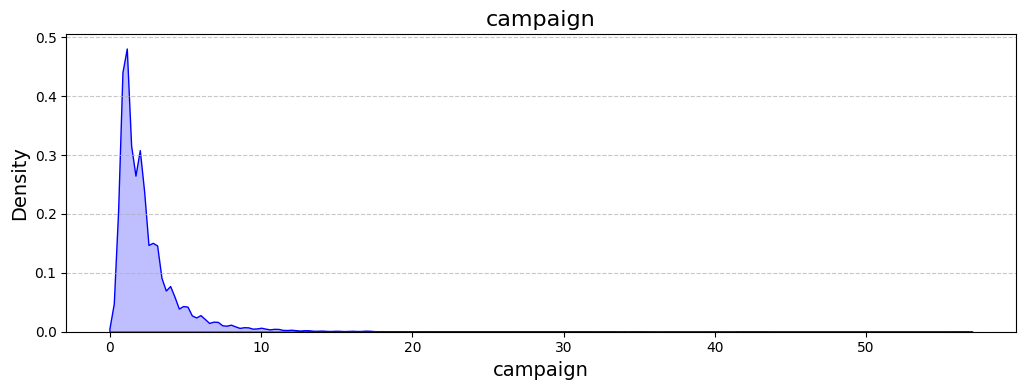

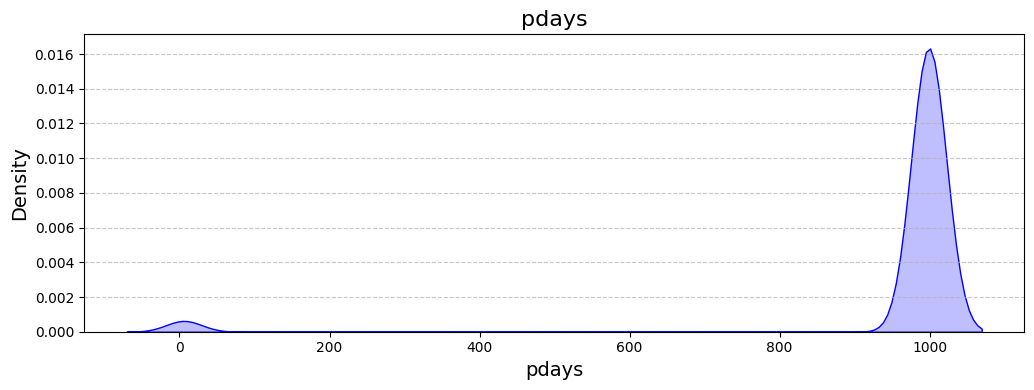

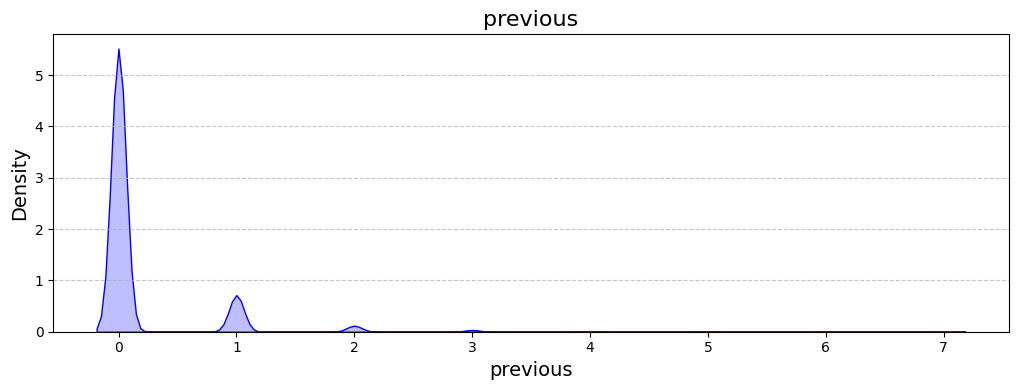

In [21]:
for i in num_var:
    plt.figure(figsize=(20, 4))
    # Create KDE plot
    plt.subplot(121)
    sns.kdeplot(df[i], shade=True, color='blue')
    plt.title(f'{i}', fontsize=16)
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Bivariate analysis of numerical columns

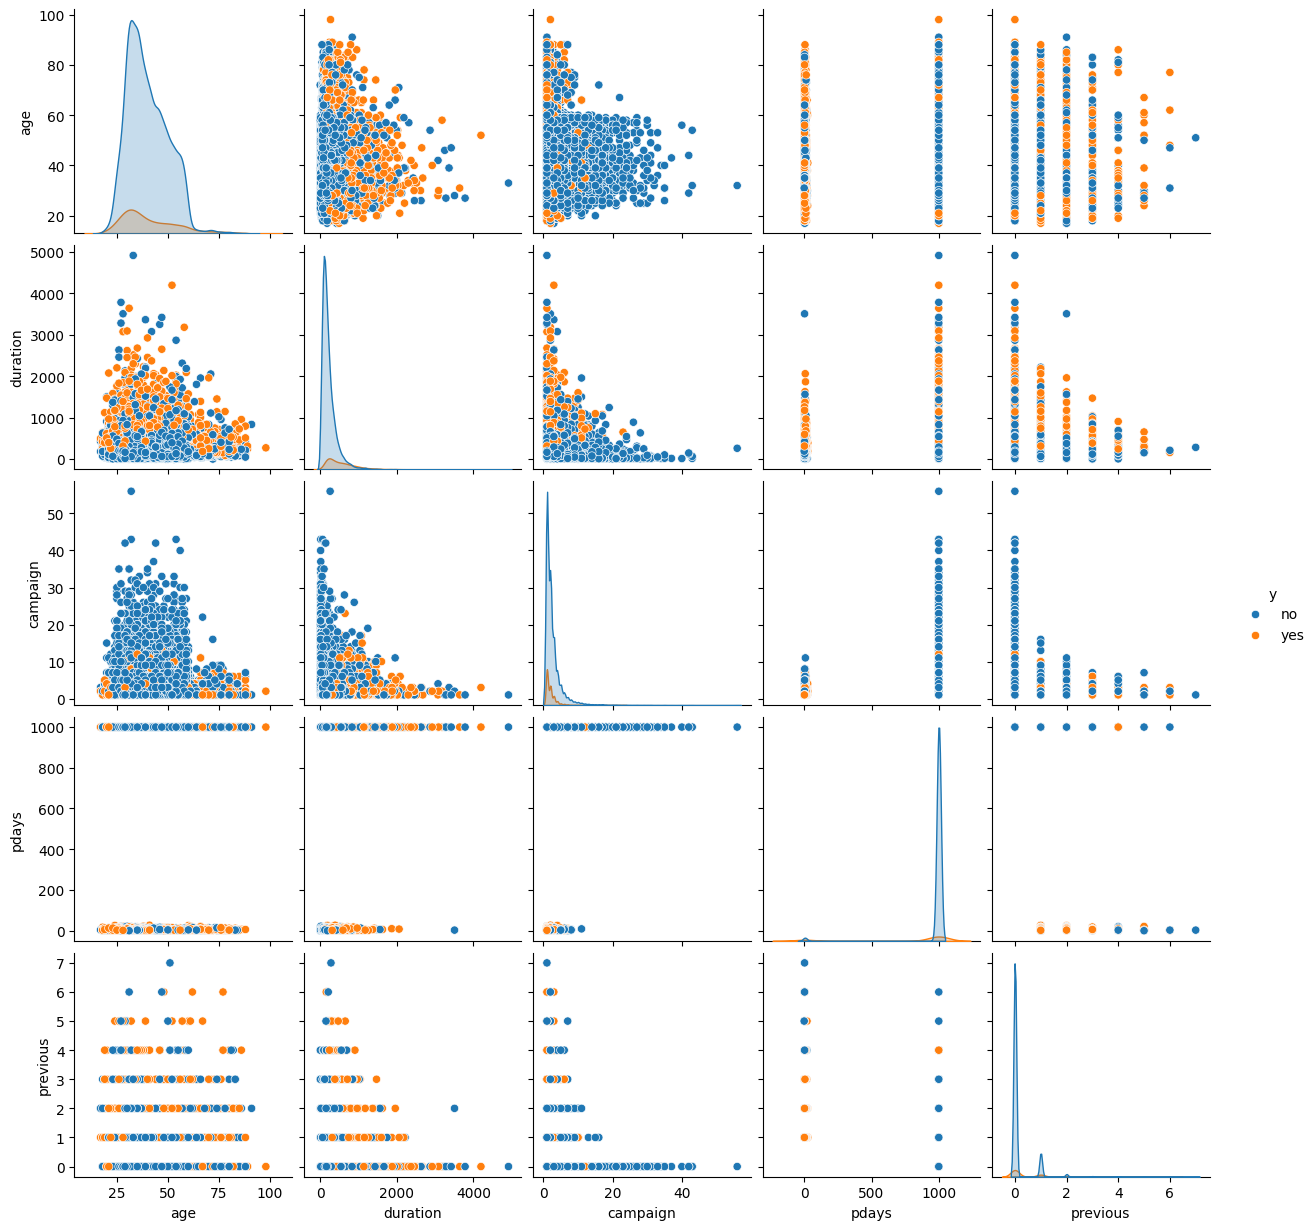

In [22]:
sns.pairplot(df,hue='y')


Identifying unique values

In [23]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print("*"*1000)

age
[49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
**********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [24]:
#The missing values in some columns have been represented as unknown.Hence replacing unknown with mode
lst=['job','marital','education','default','housing','loan']
for i in lst:
  mode=df[i].mode()[0]
  df[i]=df[i].replace('unknown',mode)

In [25]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print("*"*1000)

age
[49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
**********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [26]:
df['y']=df['y'].map({'yes':1,'no':0})

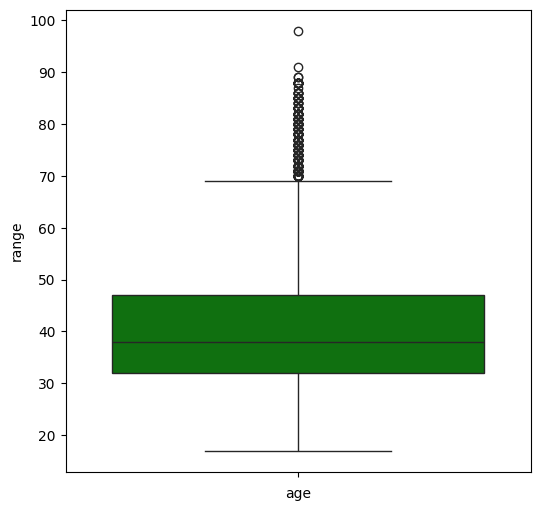

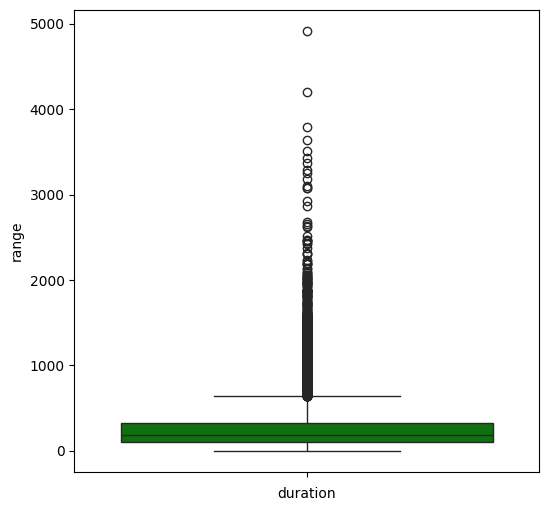

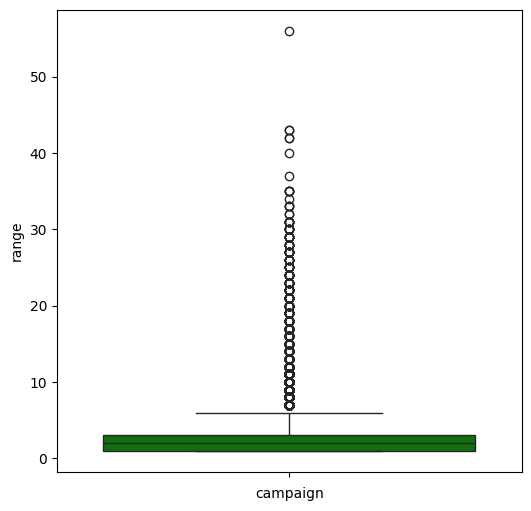

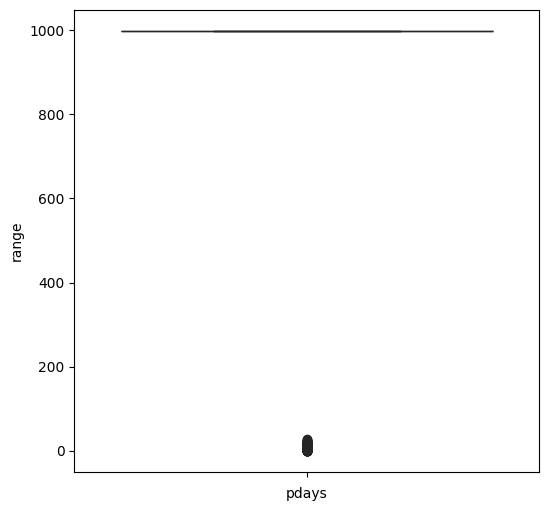

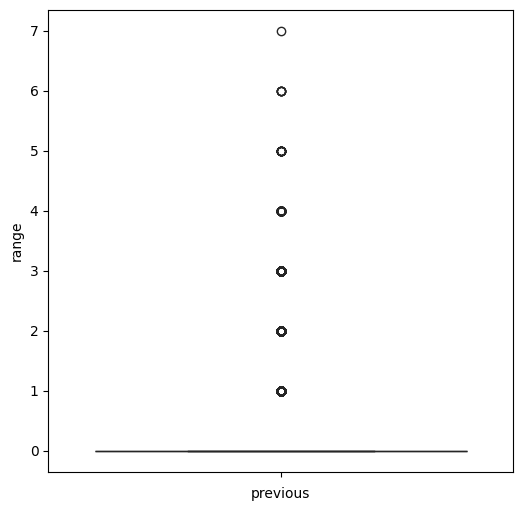

In [27]:
#Plotting box plot for identifying outlayers
for i in num_var:
  plt.figure(figsize=(6,6))
  sns.boxplot(df[i],color='green')
  plt.xlabel(i)
  plt.ylabel('range')

Observations


*   As we can see from the box plot, the features age, duration and campaign are heavily skewed and this is due to the presence of outliers.

*   Since pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.



# Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lst2=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']
for i in lst2:
  df[i]=lb.fit_transform(df[i])
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,999,0,1,0
32946,52,9,1,5,0,1,0,0,7,0,64,1,999,1,0,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,999,0,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1,0


Checking Correlation of feature variables

<Axes: >

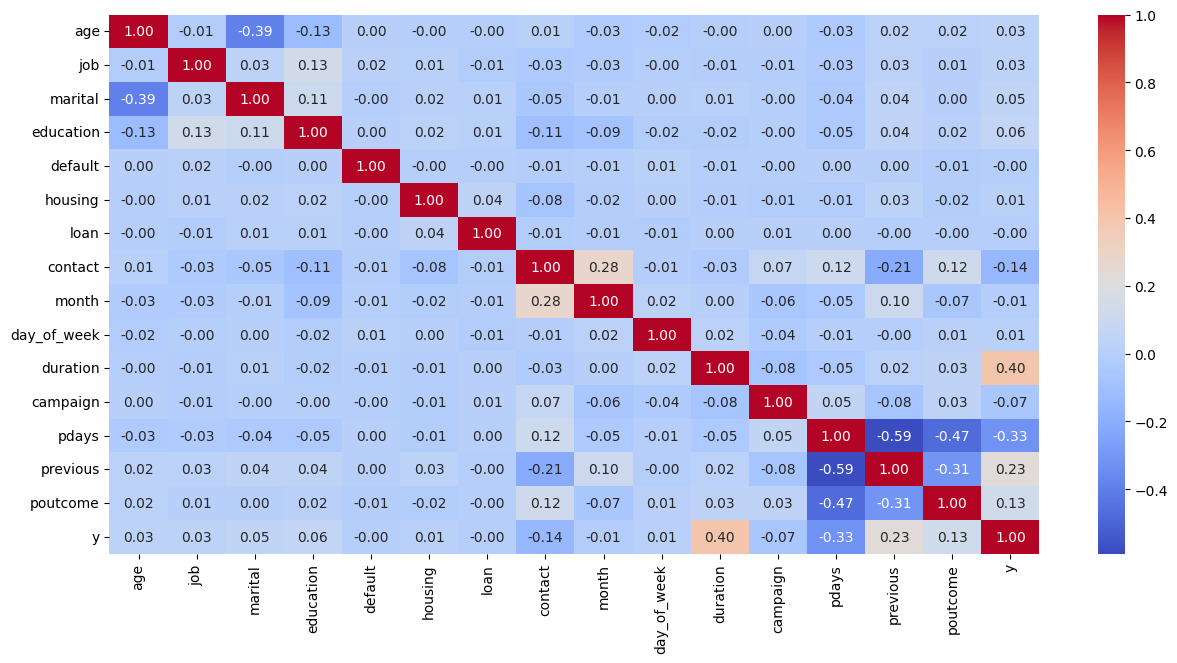

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt=".2f")

In [30]:
#feature variables
x= df.iloc[:, :-1]
# target variable
y= df.iloc[:, -1]
#categorical features
m=df.drop(num_var,axis=1)

In [31]:
#chi-squared (chi2) method is used to find independence between categorical variables
from sklearn.feature_selection import chi2
score=chi2(m,y)

In [32]:
#fscore
f_value=pd.Series(score[0],index=m.columns)
f_value.sort_values(ascending=False)

y              29230.000000
contact          428.977329
education        132.215573
poutcome          76.797309
job               75.390499
marital           24.949770
day_of_week        4.593268
month              2.357495
housing            1.408386
default            0.380978
loan               0.008014
dtype: float64

In [33]:
#p value
p_value=pd.Series(score[1],index=m.columns)
p_value.sort_values(ascending=False)

loan           9.286682e-01
default        5.370801e-01
housing        2.353245e-01
month          1.246822e-01
day_of_week    3.209776e-02
marital        5.884354e-07
job            3.862441e-18
poutcome       1.894355e-18
education      1.342230e-30
contact        2.713144e-95
y              0.000000e+00
dtype: float64

Text(0.5, 1.0, 'p-value graph')

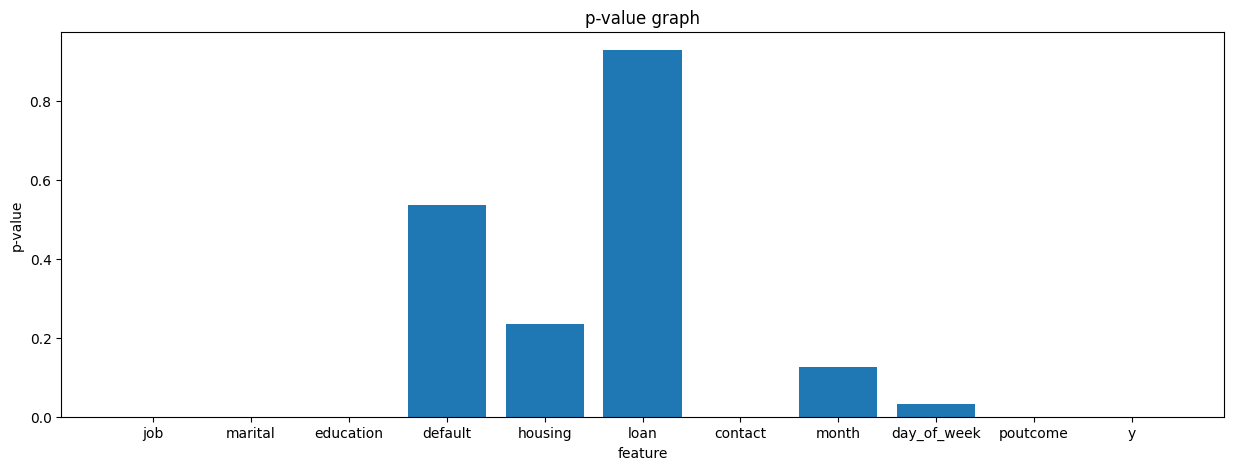

In [34]:
plt.figure(figsize=(15,5))
plt.bar(p_value.index,p_value)
plt.xlabel('feature')
plt.ylabel('p-value')
plt.title("p-value graph")

In [35]:
X=x.drop(['default','housing','loan','month','day_of_week','pdays','previous'],axis=1)


Handling Outlayers

In [36]:
#age,campaign and duration  are skewed towards right,we will compute the IQR(Interquartile Range) and replace the outliers with the lower and upper bounderies
def iqr_method(df,variables):
  q1=df[variables].quantile(0.25)
  q3=df[variables].quantile(0.75)
  iqr=q3-q1
  upper=q3+(1.5*iqr)
  lower=q1-(1.5*iqr)
  return lower,upper

In [37]:
lower_lim,upper_lim=iqr_method(df,'age')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  9.5
upper limit =  69.5


In [38]:
df['age']=np.where(df['age']>upper_lim,upper_lim,
                   np.where(df['age']<lower_lim,lower_lim,df['age']))

In [39]:
lower_lim,upper_lim=iqr_method(df,'duration')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -221.0
upper limit =  643.0


In [40]:
df['duration']=np.where(df['duration']>upper_lim,upper_lim,
                   np.where(df['duration']<lower_lim,lower_lim,df['duration']))

In [41]:
lower_lim,upper_lim=iqr_method(df,'campaign')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -2.0
upper limit =  6.0


In [42]:
df['campaign']=np.where(df['campaign']>upper_lim,upper_lim,
                   np.where(df['campaign']<lower_lim,lower_lim,df['campaign']))

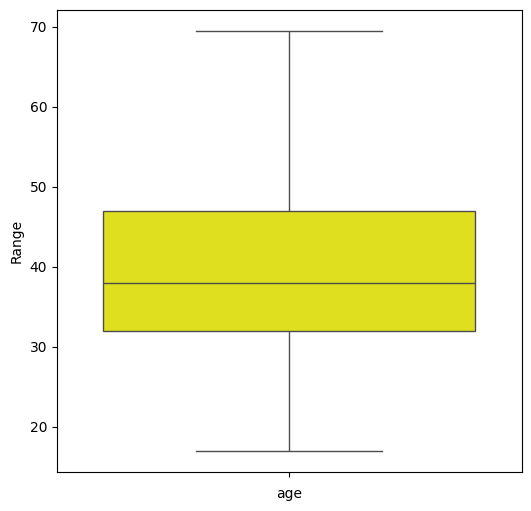

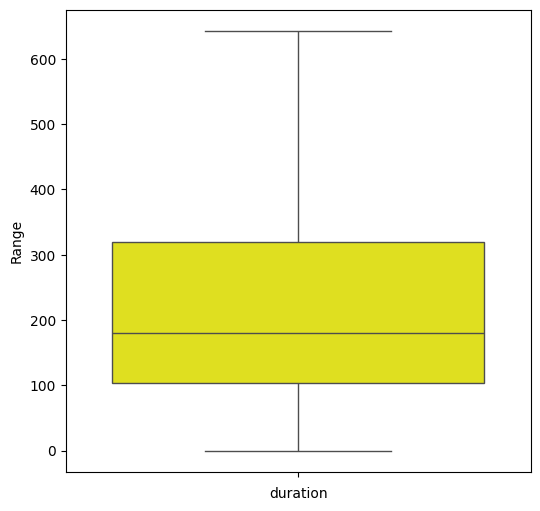

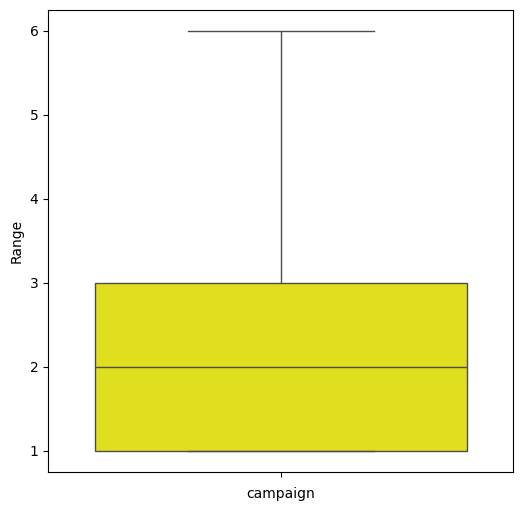

In [43]:
for i in["age","duration","campaign"]:
 plt.figure(figsize=(6, 6))
 sns.boxplot(df[i],color='yellow')
 plt.xlabel(i)
 plt.ylabel('Range')


Handling Imbalanced dataset


*   
Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.



In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(X,y)
y_resampled.value_counts()

y
0    29230
1    29230
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

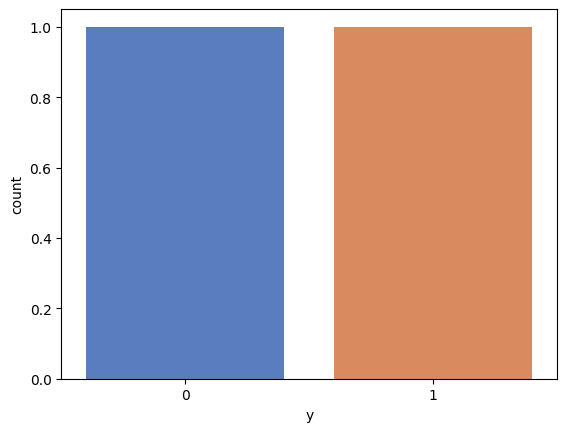

In [45]:
 #checking the oversampling output
sns.countplot(y_resampled.value_counts(), palette='muted')

In [46]:
x_resampled=x_resampled.values
y_resampled=y_resampled.values

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,random_state=42,test_size=0.30)

# Normalization

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [81]:
x_train[0:8]

array([[ 0.67062595,  1.55685021, -0.17962136,  0.63412769, -0.53464424,
        -0.13531764,  2.63621131,  0.25502307],
       [ 1.69179621, -1.03163096, -0.17962136,  1.13974453, -0.53464424,
         0.36958456,  0.38093182,  0.25502307],
       [ 0.92591851, -1.03163096, -0.17962136,  0.63412769,  1.87040265,
        -0.86305376, -0.07012408,  0.25502307],
       [ 1.09611356,  1.55685021, -0.17962136,  0.63412769, -0.53464424,
        -0.49354433, -0.52117998,  0.25502307],
       [-0.26544679, -0.45641293, -0.17962136, -0.88272284, -0.53464424,
        -0.10711081, -0.52117998, -2.07237523],
       [-0.26544679, -0.74402194, -1.82696904, -0.88272284,  1.87040265,
        -0.46533751,  0.38093182,  0.25502307],
       [-0.18034927, -0.74402194, -0.17962136, -0.88272284,  1.87040265,
         1.55427127, -0.52117998,  0.25502307],
       [ 1.09611356,  0.98163217, -0.17962136, -0.88272284, -0.53464424,
        -0.25378631, -0.07012408, -2.07237523]])

In [85]:
df['poutcome'].min()

0

In [64]:
X

,age,job,marital,education,contact,duration,campaign,poutcome
0,49,1,1,2,0,227,4,1
1,37,2,1,6,1,202,2,0
2,78,5,1,0,0,1148,1,1
3,36,0,1,6,1,120,2,1
4,59,5,0,6,0,368,2,1
...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,192,1,1
32946,52,9,1,5,0,64,1,0
32947,54,0,1,2,0,131,4,1
32948,29,0,1,6,1,165,1,1


# Model Creation

In [49]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
knn=KNeighborsClassifier()
svm=SVC()
nb=BernoulliNB()
dec=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
xgb = XGBClassifier()
lst=[knn,svm,nb,dec,rf,xgb]

model is KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      8773
           1       0.84      0.89      0.86      8765

    accuracy                           0.86     17538
   macro avg       0.86      0.86      0.86     17538
weighted avg       0.86      0.86      0.86     17538

Accuracy score of KNeighborsClassifier()   0.8603033413159995
***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

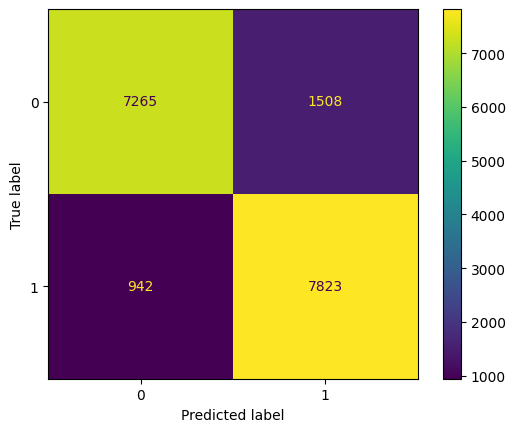

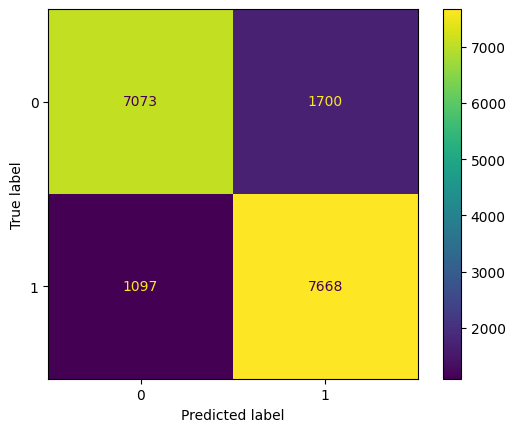

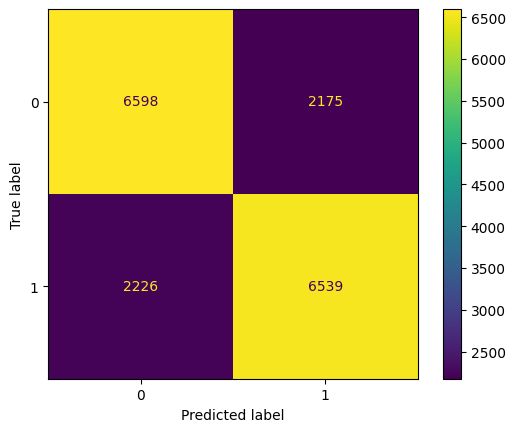

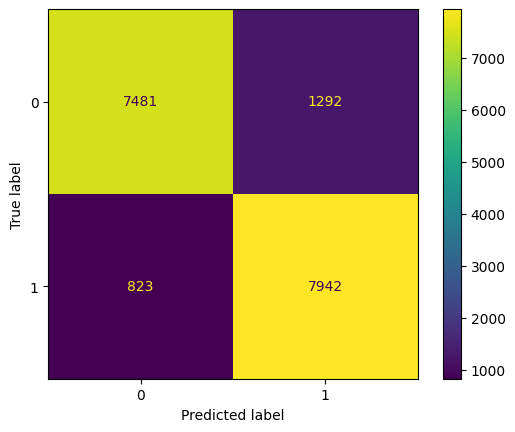

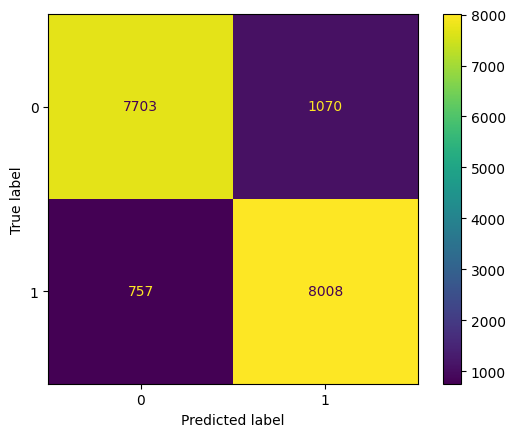

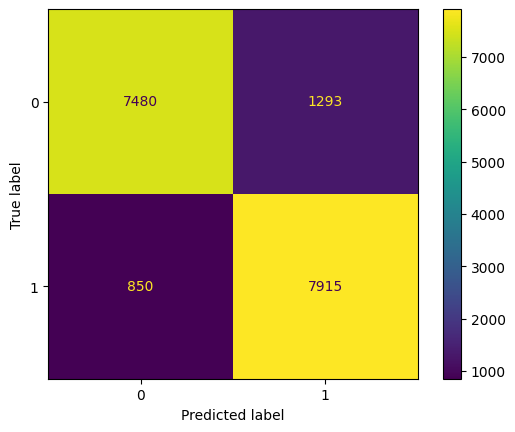

In [50]:
for i in lst:
   print("model is",i)
   i.fit(x_train,y_train)
   y_pred=i.predict(x_test)
   print(classification_report(y_test,y_pred))
   print("Accuracy score of",i," ",accuracy_score(y_test,y_pred))
   labels=[0,1]
   result=confusion_matrix(y_test,y_pred)
   cmd=ConfusionMatrixDisplay(result,display_labels=labels)
   cmd.plot()
   print("*"*1000)

In [51]:
#compairing different models
alg=['KNN','Naive Bayes','SVM','Decision Tree','Random Forest','XGBoost']
accuracy_scores=[0.8603,0.7490,0.8405,0.8817,0.8962,0.8778]
#create the DataFrame
metrics_df=pd.DataFrame({'Algorithms':alg,'Accuracy':accuracy_scores})
#multiply the scores by 100
metrics_df[['Accuracy']]*=100
#print the DataFrame
print(metrics_df)

      Algorithms  Accuracy
0            KNN     86.03
1    Naive Bayes     74.90
2            SVM     84.05
3  Decision Tree     88.17
4  Random Forest     89.62
5        XGBoost     87.78


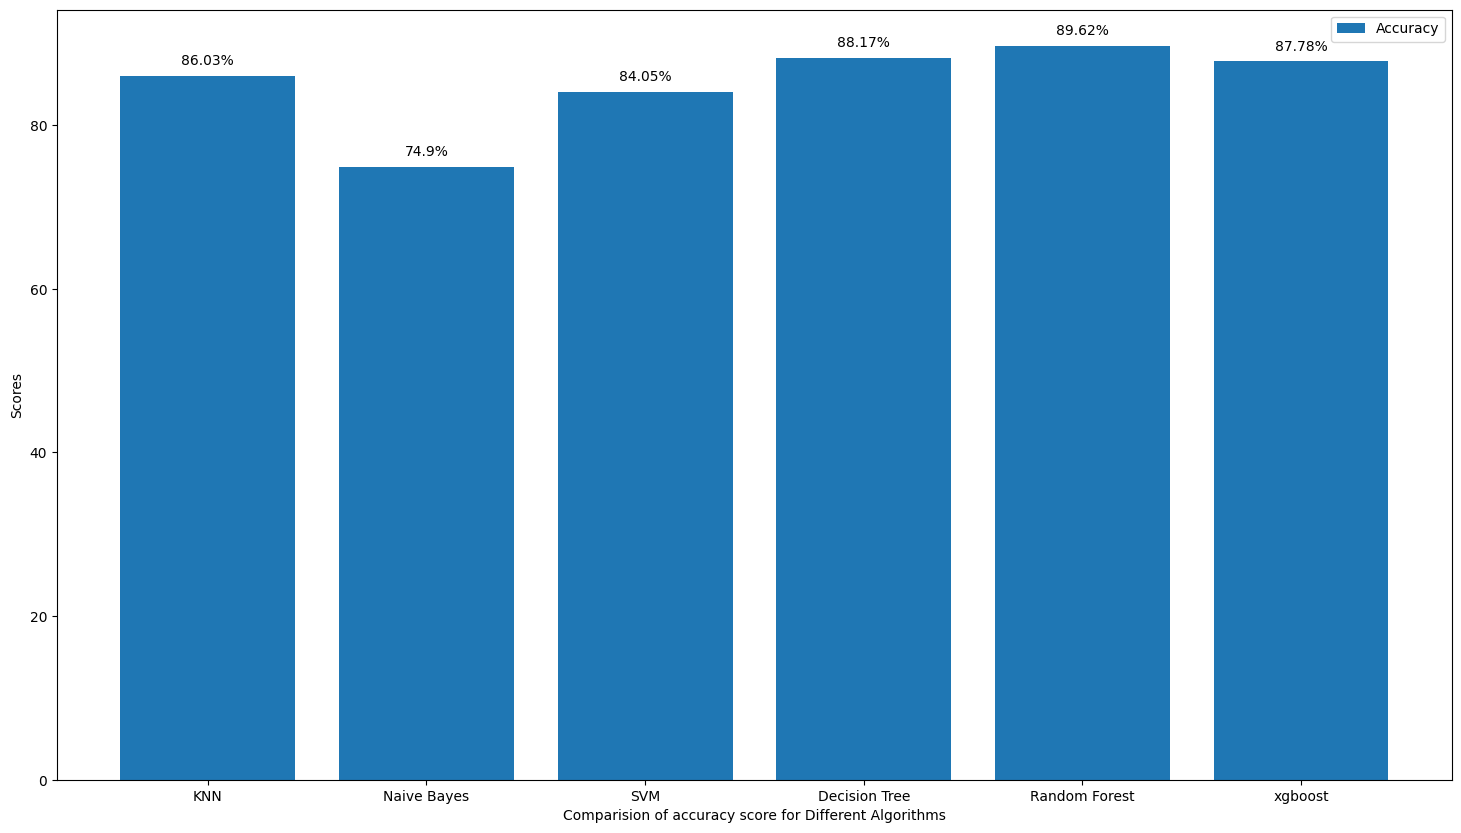

In [52]:
#sample data
alg=['KNN','Naive Bayes','SVM','Decision Tree','Random Forest','xgboost']
accuracy=[86.03,74.90,84.05,88.17,89.62,87.78]

#set the position of the bars on the x-axis
index=np.arange(len(alg))

# creating the bar graph for showing accuracy for different algorithms.
plt.figure(figsize=(18,10))
plt.bar(alg,accuracy,label='Accuracy')
for i,value in enumerate(accuracy):
  plt.text(i,value+1,f'{value}%',ha='center',va='bottom')

#adding labels and tittle
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.xlabel('Comparision of accuracy score for Different Algorithms')
plt.legend()

Observation


*   Random Forest Model seems to have the highest accuracy. This model may be a good choice for predicting whether a customer will subscribe to a term deposit.



# Hyper Parameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV
random_parameters = {'n_estimators':[5,10,15,20,25],'criterion':['gini','entropy']}
clf1=GridSearchCV(rf,random_parameters,cv=10,scoring='accuracy')
clf1.fit(x_train,y_train)
print(clf1.best_params_)

{'criterion': 'gini', 'n_estimators': 20}


In [59]:
rf1=RandomForestClassifier(n_estimators=25,criterion='entropy')
rf1.fit(x_train,y_train)
y_pred1=rf1.predict(x_test)
y_pred1
print("accuracy score is",accuracy_score(y_test,y_pred1))

accuracy score is 0.9009579199452618


In [55]:
#Prediction by using a random input
y_pred=rf1.predict(scaler.transform([[69,5,1,1,0,643,1,1]]))
y_pred
if y_pred[0]==1:
  print("client will subscibe to a term deposit")
else:
  print("client will not subscibe to a term deposit")

client will subscibe to a term deposit


In [56]:
y_predict2=rf1.predict(scaler.transform([[78,5,1,0,0,1,1148,1]]))
y_predict2
if y_predict2[0]==1:
  print("client will subscibe to a term deposit")
else:
  print("client will not subscibe to a term deposit")

client will not subscibe to a term deposit


In [87]:
import pickle
pickle.dump(rf1, open('/content/rf1model.pkl', 'wb'))

In [88]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [89]:
! wget -q -O - ipv4.icanhazip.com

104.198.64.115


In [ ]:
! streamlit run project.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.198.64.115:8501

npx: installed 22 in 5.254s
your url is: https://six-dancers-happen.loca.lt
